In [ ]:
!pip install lime

In [ ]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import kagglehub
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from tensorflow import keras
from tensorflow.keras import layers
import lime.lime_tabular
from skimage.segmentation import mark_boundaries
import shap
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/creditcard.csv')


In [ ]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(1081)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.689830      -0.769031      -0.552509   
50%        -0.022248      -0.053468      -0.275168       0.040859   
75%         0.739647       0.612218       0.396792       0.570474   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V21            V22  \
count  283726.000000  283726.000000  ...  283726.000000  283726.000000   
mean       -0.000854      -0.001596  ...      -0.000371      -0.000015   
std         1.179054       1.095492  ...       0.723909       0.724550   
min       -73.216718     -13.434066  ...     -34.830382     -10.933144   
25%        -0.208828      -0.644221  ...      -0.228305      -0.542700   
50%         0.021898      -0.052596  ...      -0.029441       0.006675   
75%         0.325704       0.595977  ...       0.186194       0.528245   
max        20.007208      15.594995  ...      27.202839      10.503090   

                 V23            V24            V25            V26  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.000198       0.000214      -0.000232       0.000149   
std         0.623702       0.605627       0.521220       0.482053   
min       -44.807735      -2.836627     -10.295397      -2.604551   
25%        -0.161703      -0.354453      -0.317485      -0.326763   
50%        -0.011159       0.041016       0.016278      -0.052172   
75%         0.147748       0.439738       0.350667       0.240261   
max        22.528412       4.584549       7.519589       3.517346   

                 V27            V28         Amount          Class  
count  283726.000000  283726.000000  283726.000000  283726.000000  
mean        0.001763       0.000547      88.472687       0.001667  
std         0.395744       0.328027     250.399437       0.040796  
min       -22.565679     -15.430084       0.000000       0.000000  
25%        -0.070641      -0.052818       5.600000       0.000000  
50%         0.001479       0.011288      22.000000       0.000000  
75%         0.091208       0.078276      77.510000       0.000000  
max        31.612198      33.847808   25691.160000       1.000000  

[8 rows x 31 columns]

In [ ]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

X_res_df = pd.DataFrame(X_res, columns=X.columns)
y_res_df = pd.DataFrame(y_res, columns=["Class"])

balanced_df = pd.concat([X_res_df, y_res_df], axis=1)
balanced_df.to_csv("balanced_creditcard.csv", index=False)
print("Saved balanced dataset to balanced_creditcard.csv")

Saved balanced dataset to balanced_creditcard.csv


EDA


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

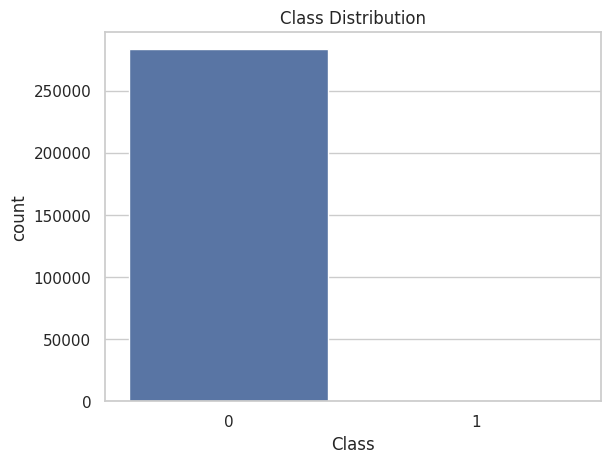

In [ ]:
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.show()

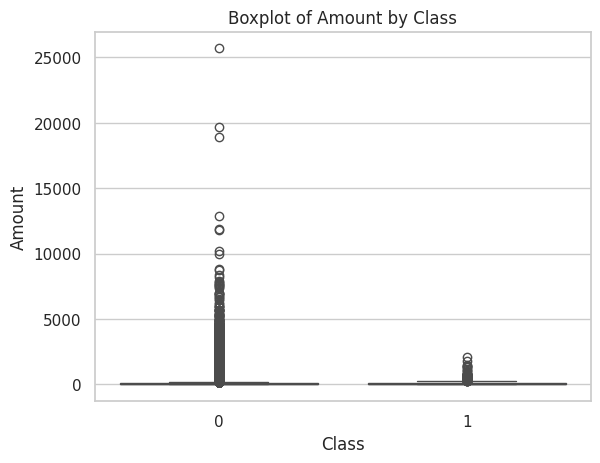

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount by Class')
plt.show()

KDE Plot of Selected Features


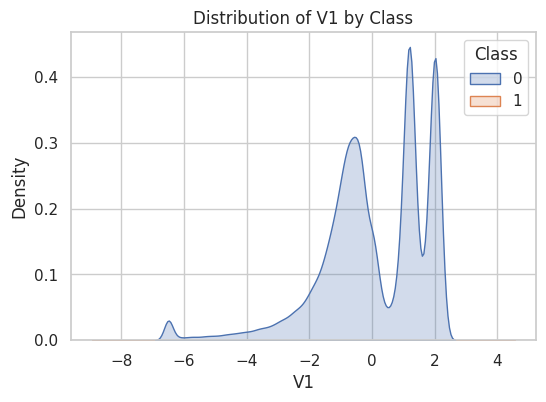

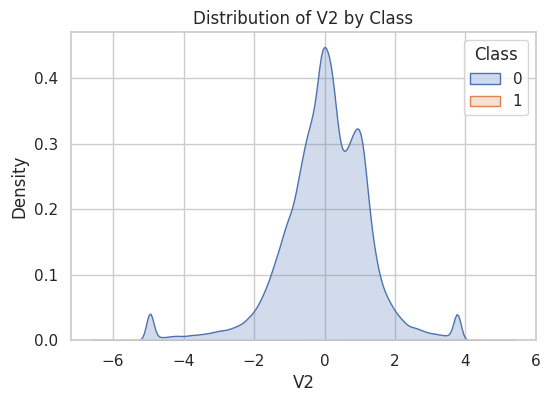

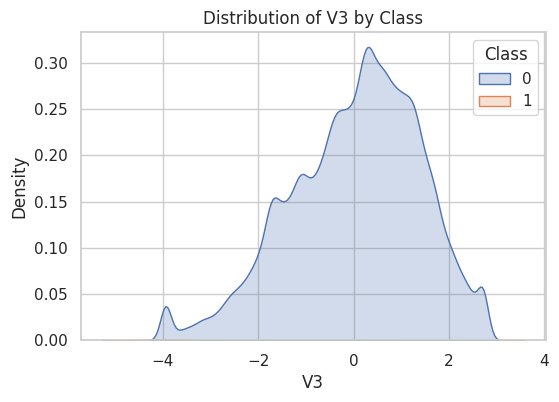

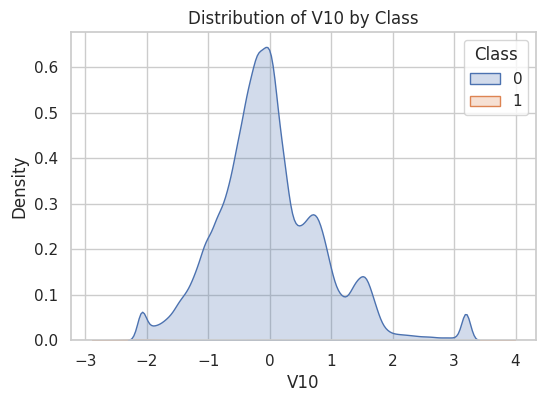

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = ['V1', 'V2', 'V3', 'V10']
for col in features:
    plt.figure(figsize=(6, 4))
    data_clipped = df[col].clip(lower=df[col].quantile(0.01),
                                 upper=df[col].quantile(0.99))
    plot_df = pd.DataFrame({col: data_clipped, 'Class': df['Class']})
    sns.kdeplot(data=plot_df, x=col, hue='Class', fill=True)
    plt.title(f'Distribution of {col} by Class')
    plt.show()

Univariate Analysis

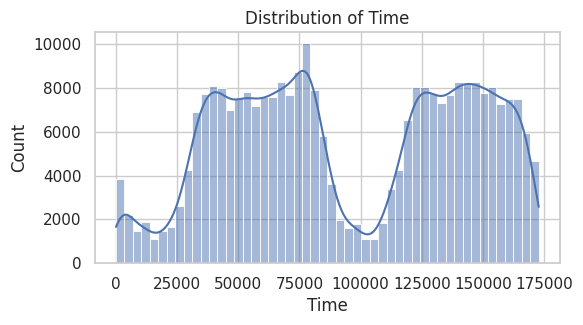

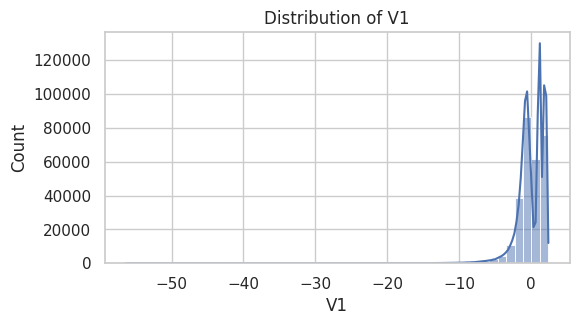

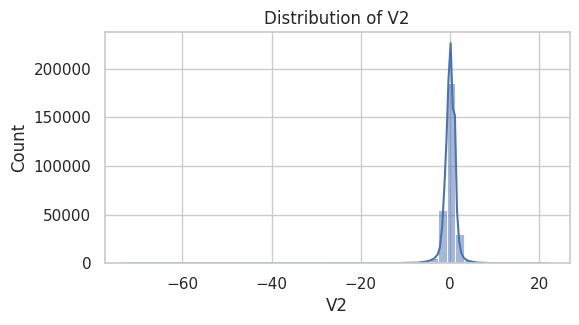

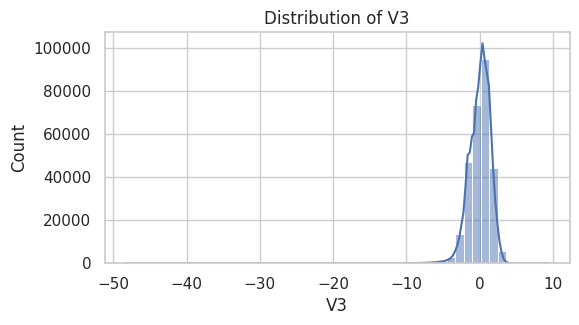

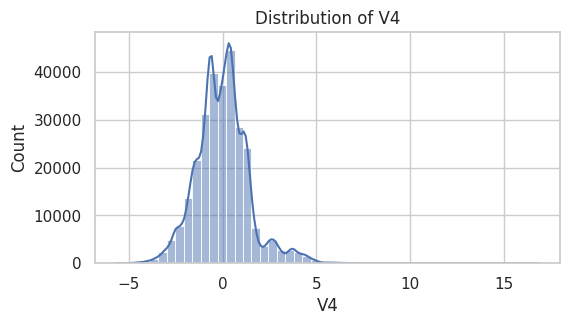

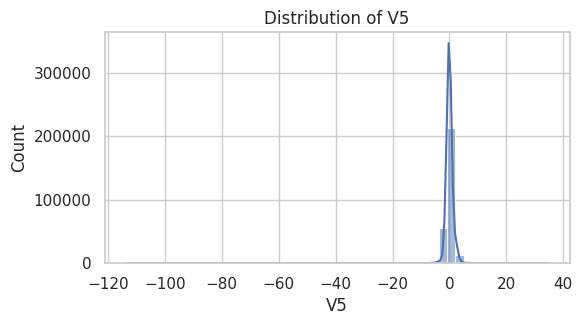

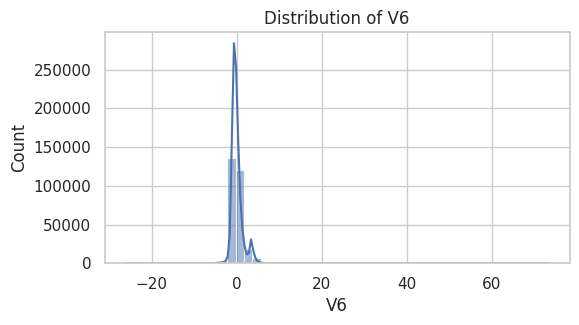

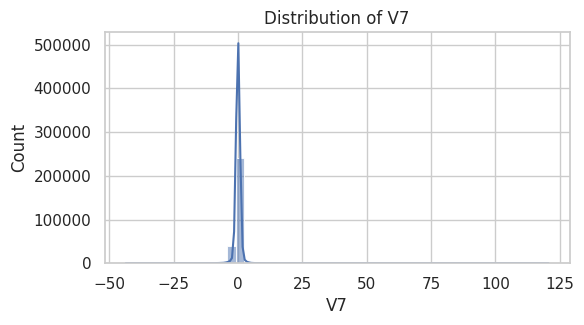

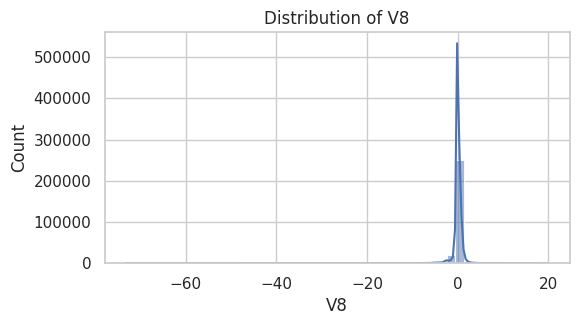

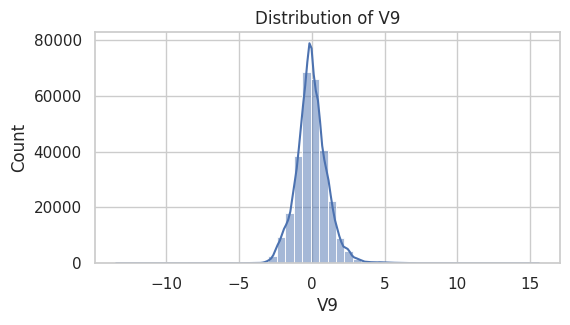

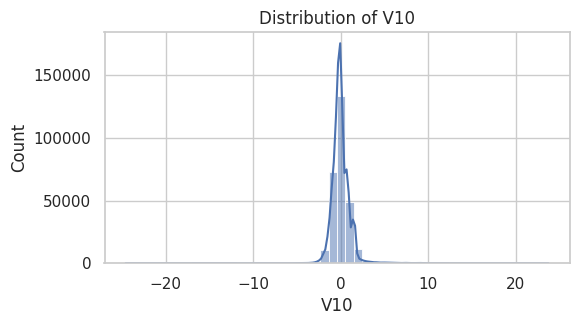

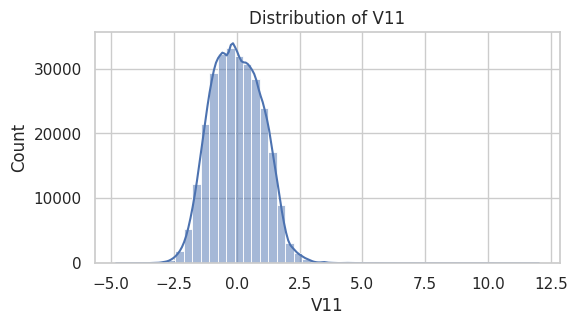

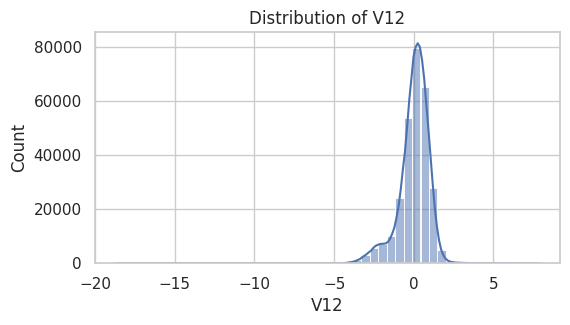

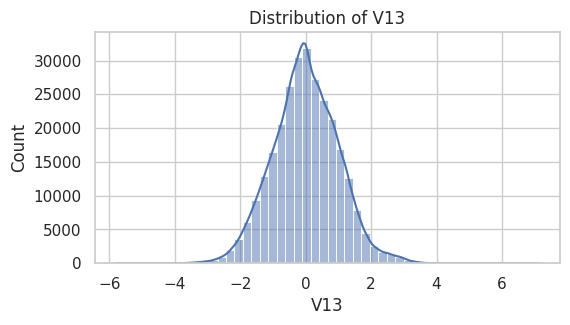

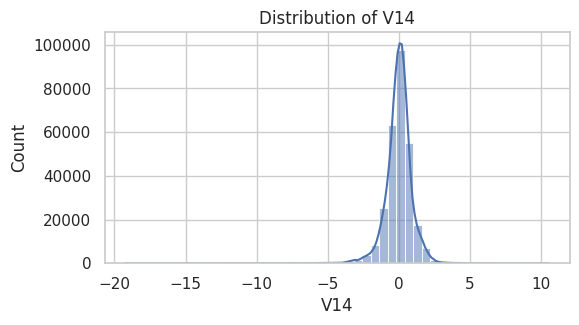

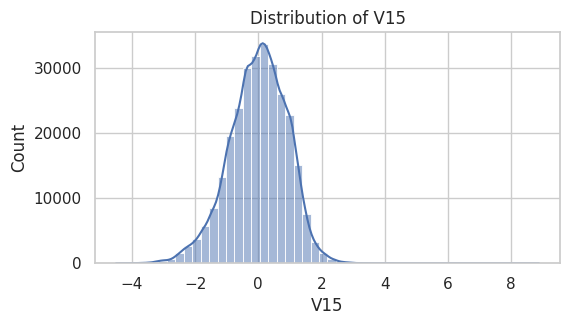

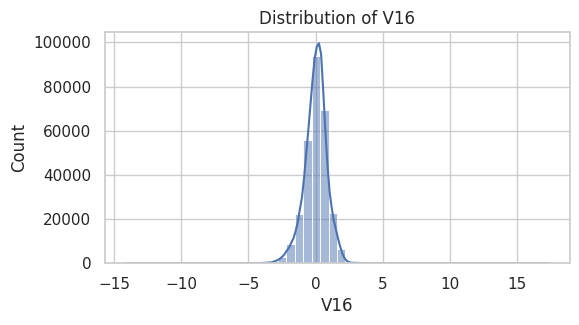

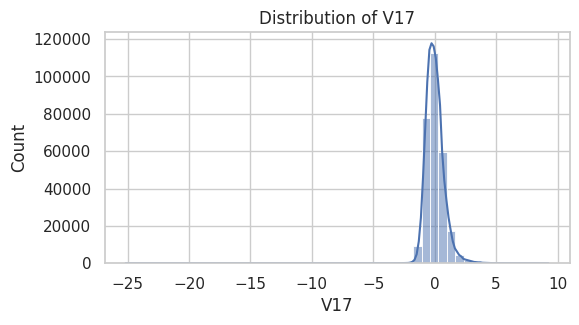

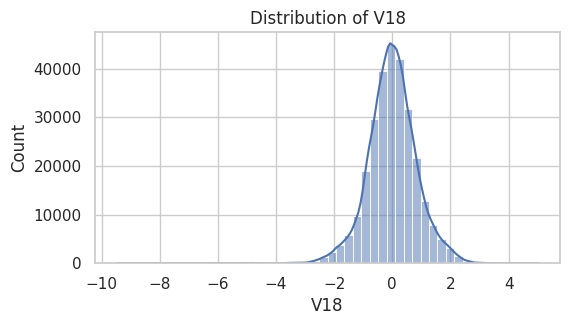

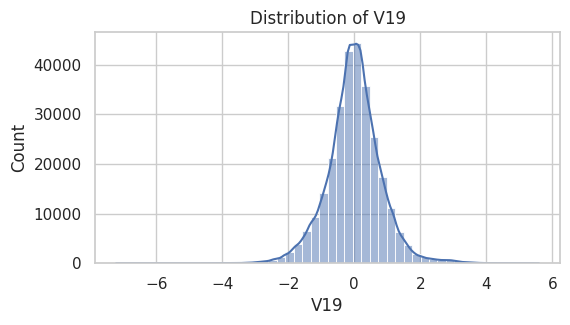

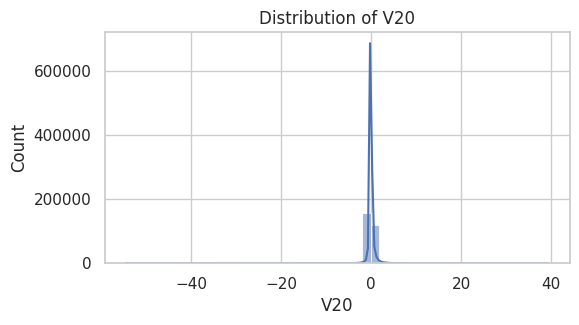

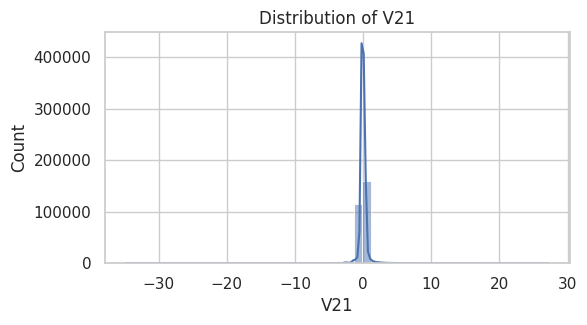

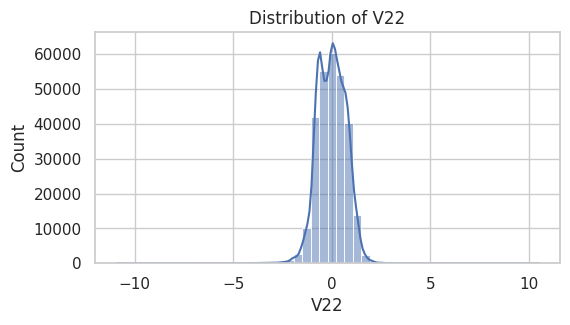

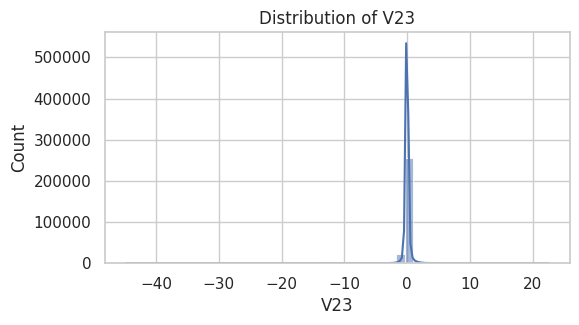

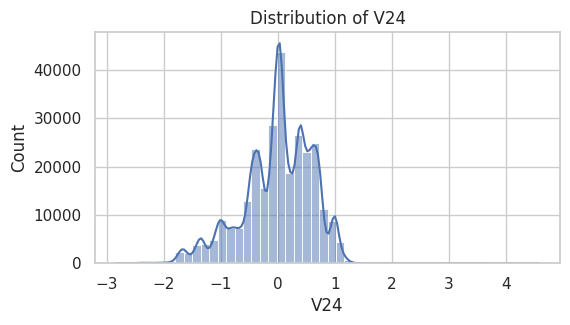

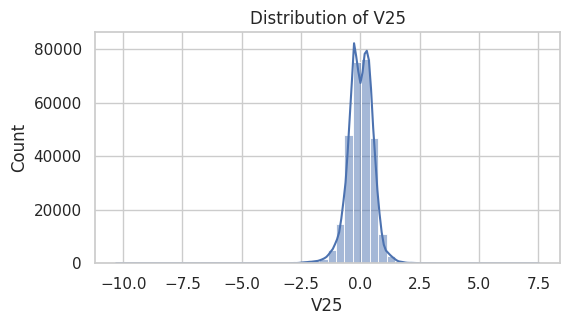

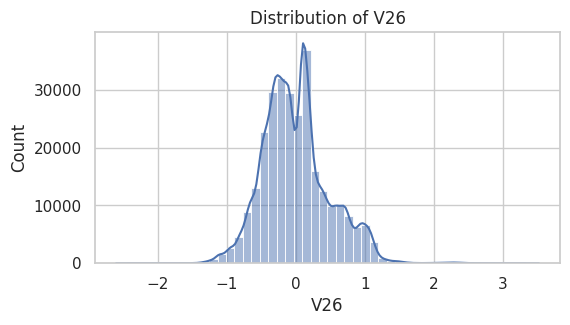

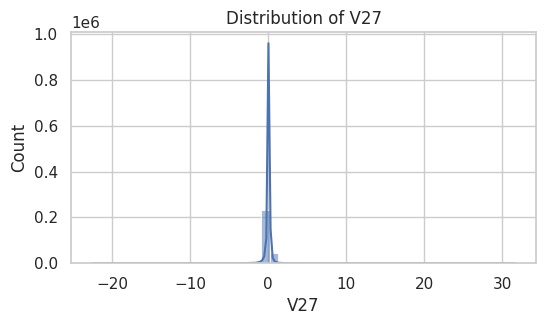

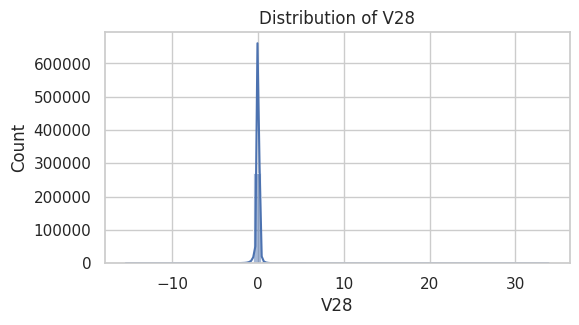

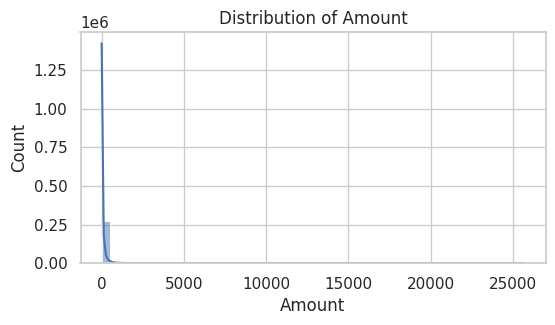

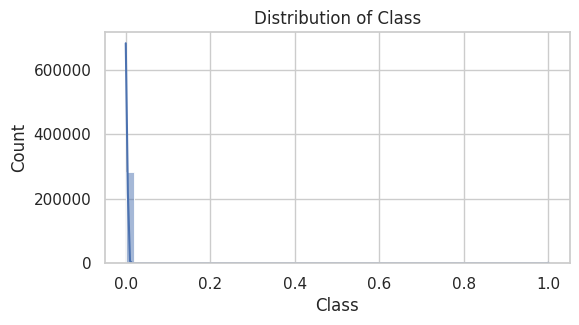

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
print("Skewness and Kurtosis:")
for col in num_cols:
    print(f"{col}: Skew={skew(df[col]):.2f}, Kurtosis={kurtosis(df[col]):.2f}")

Skewness and Kurtosis:
Time: Skew=-0.04, Kurtosis=-1.29
V1: Skew=-3.27, Kurtosis=32.73
V2: Skew=-4.70, Kurtosis=96.90
V3: Skew=-2.15, Kurtosis=25.19
V4: Skew=0.67, Kurtosis=2.62
V5: Skew=-2.41, Kurtosis=209.27
V6: Skew=1.83, Kurtosis=42.84
V7: Skew=2.89, Kurtosis=414.13
V8: Skew=-8.31, Kurtosis=215.01
V9: Skew=0.54, Kurtosis=3.52
V10: Skew=1.25, Kurtosis=29.84
V11: Skew=0.34, Kurtosis=1.55
V12: Skew=-2.20, Kurtosis=18.94
V13: Skew=0.06, Kurtosis=0.20
V14: Skew=-1.92, Kurtosis=23.04
V15: Skew=-0.31, Kurtosis=0.29
V16: Skew=-1.05, Kurtosis=9.85
V17: Skew=-3.69, Kurtosis=93.32
V18: Skew=-0.25, Kurtosis=2.51
V19: Skew=0.11, Kurtosis=1.73
V20: Skew=-2.04, Kurtosis=273.22
V21: Skew=2.82, Kurtosis=184.81
V22: Skew=-0.18, Kurtosis=2.47
V23: Skew=-5.87, Kurtosis=442.68
V24: Skew=-0.55, Kurtosis=0.62
V25: Skew=-0.42, Kurtosis=4.29
V26: Skew=0.58, Kurtosis=0.92
V27: Skew=-0.75, Kurtosis=259.17
V28: Skew=11.56, Kurtosis=959.36
Amount: Skew=16.98, Kurtosis=844.46
Class: Skew=24.43, Kurtosis=594.85


Bivariate Analysis


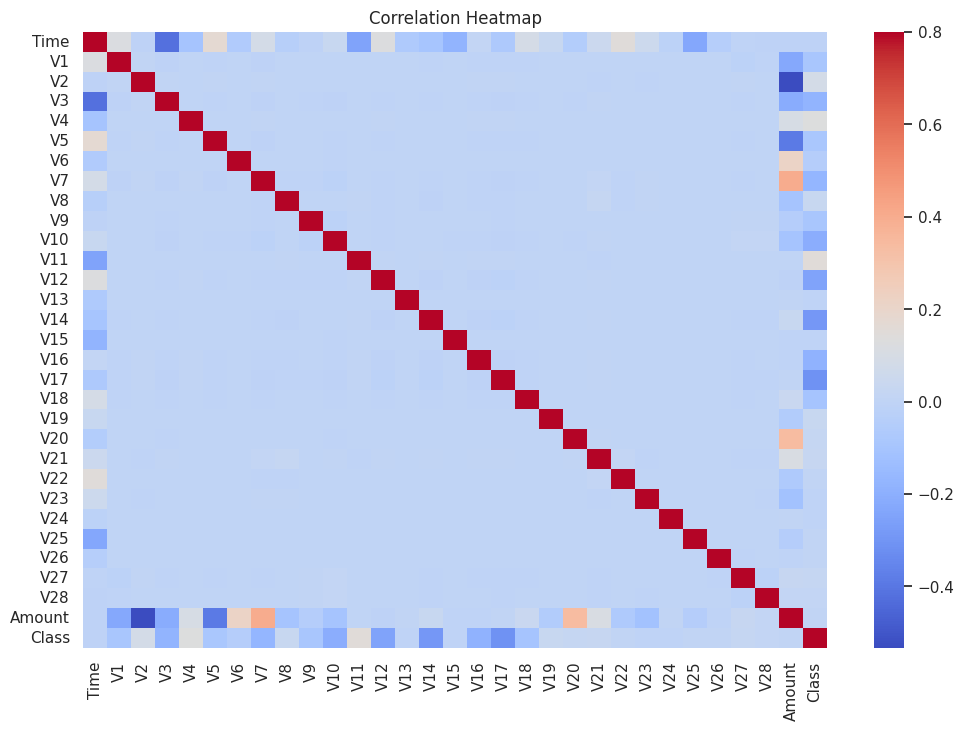

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=0.8)
plt.title('Correlation Heatmap')
plt.show()

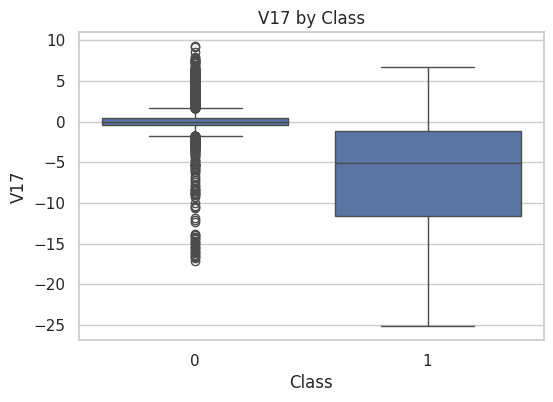

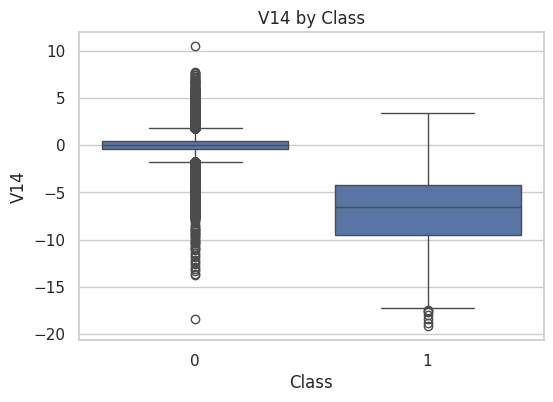

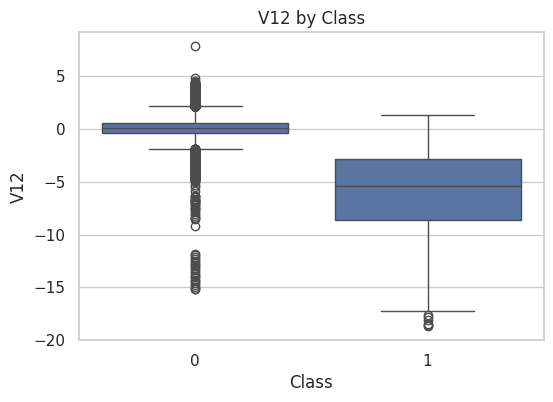

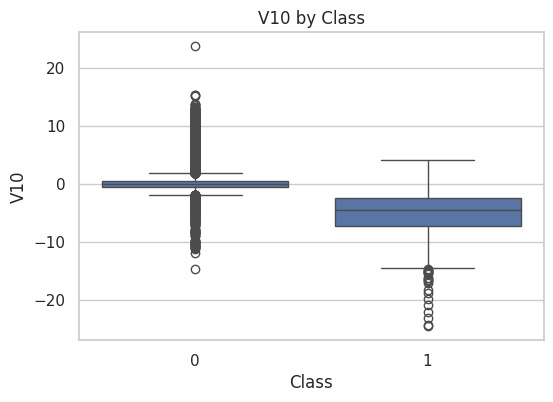

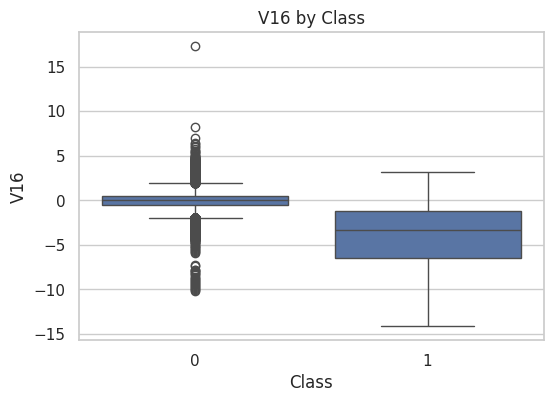

In [ ]:
corrs = df.corr()['Class'].drop('Class').abs().sort_values(ascending=False).head(5).index
for col in corrs:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'{col} by Class')
    plt.show()

Multivariate Analysis(pairplot)

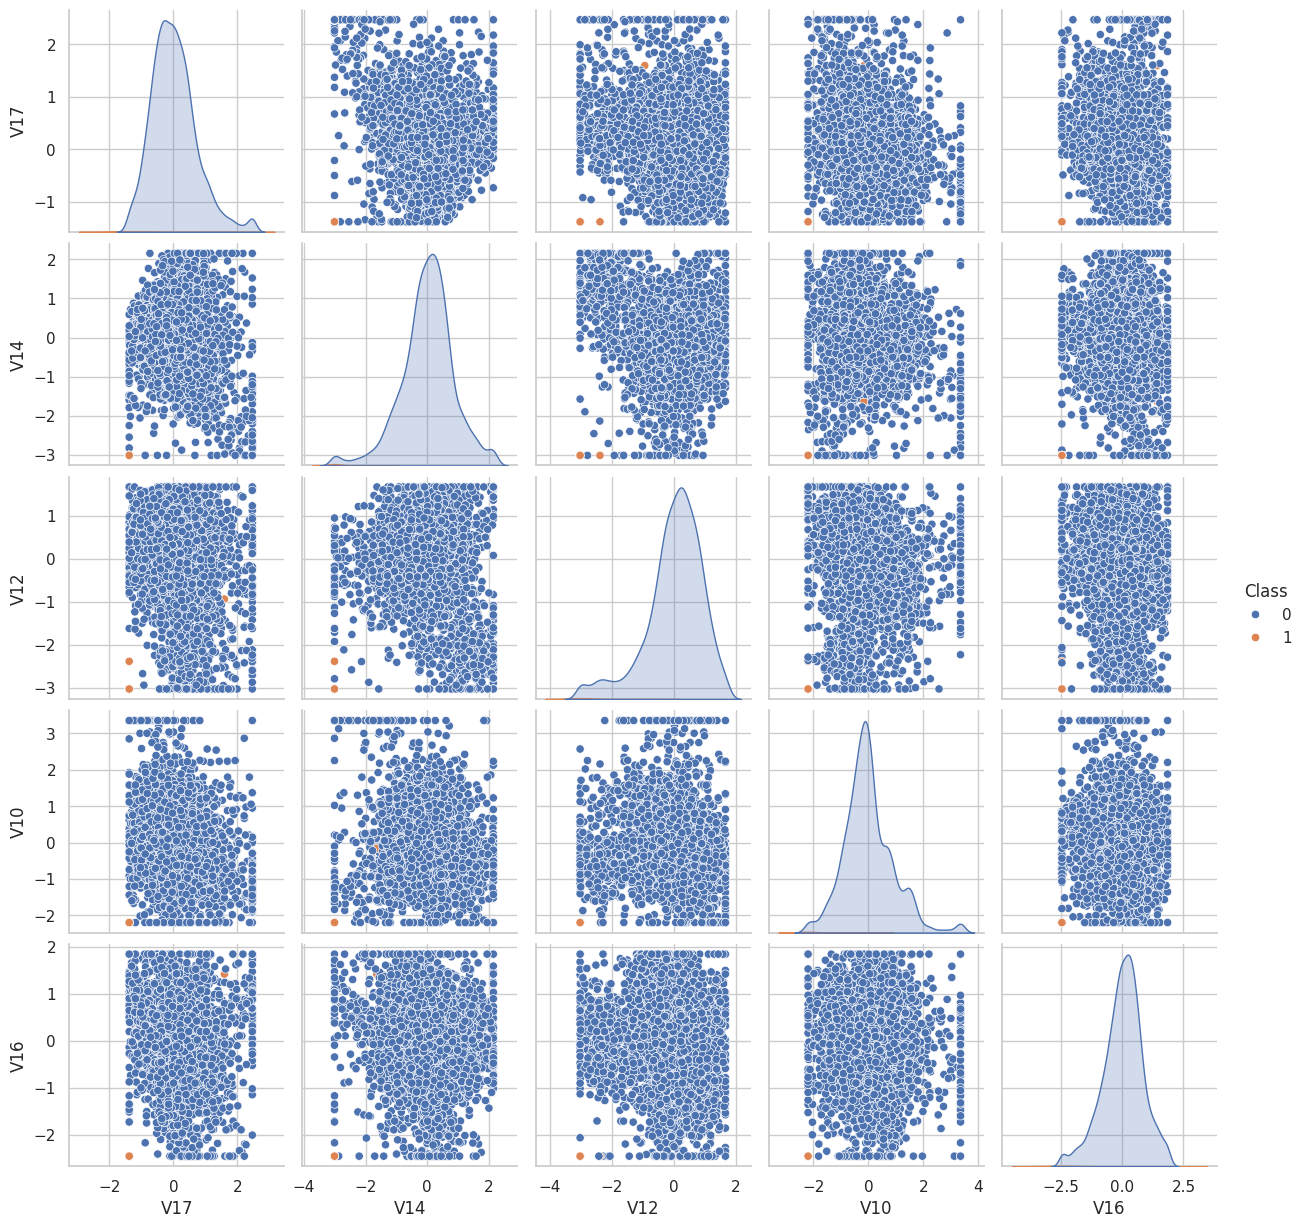

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sampled_df = df.sample(n=5000, random_state=1)
for col in corrs:
    sampled_df[col] = sampled_df[col].clip(
        lower=sampled_df[col].quantile(0.01),
        upper=sampled_df[col].quantile(0.99)
    )

sns.pairplot(sampled_df, vars=corrs.tolist(), hue='Class')
plt.show()

Feature Engineering


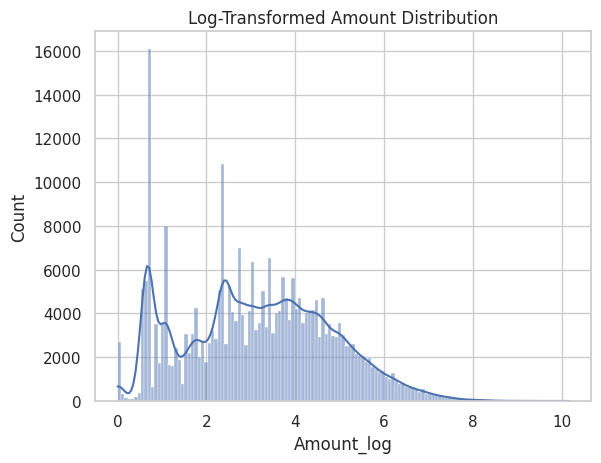

In [ ]:
df['Amount_log'] = np.log1p(df['Amount'])
sns.histplot(df['Amount_log'], kde=True)
plt.title("Log-Transformed Amount Distribution")
plt.show()

**Naiive Bayes**


In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(x_test)

In [ ]:
# Evaluation
print("Naive Bayes Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.2f}")

Naive Bayes Classifier Performance:
Accuracy: 0.91
Precision: 0.97
Recall: 0.85
F1 Score: 0.90


In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Confusion Matrix:
[[55035  1428]
 [ 8809 48030]]


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=["Not Fraud", "Fraud"]))

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.86      0.97      0.91     56463
       Fraud       0.97      0.85      0.90     56839

    accuracy                           0.91    113302
   macro avg       0.92      0.91      0.91    113302
weighted avg       0.92      0.91      0.91    113302



PDB

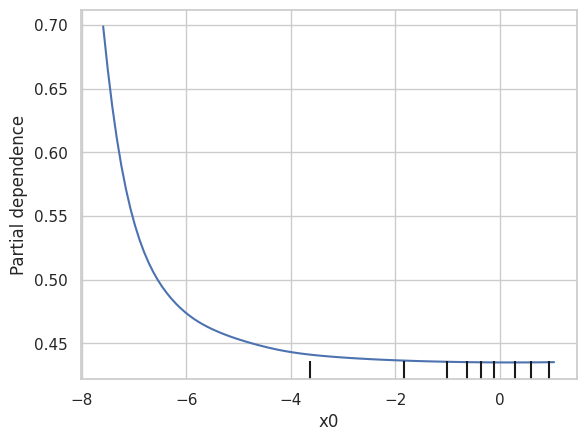

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
feature = [0]
target_class = 0

PartialDependenceDisplay.from_estimator(nb_clf, x_test, features=feature, target=target_class)
plt.show()

In [ ]:
from sklearn.inspection import partial_dependence

results = partial_dependence(nb_clf, x_test, [0])
print(results["average"])
print(" ---------------------------------------------------------- ")
print(results["grid_values"])

[[0.69890041 0.66536565 0.6360498  0.61087064 0.58943453 0.5712231
  0.5557348  0.54253771 0.53126509 0.521604   0.51328898 0.50609373
  0.49982412 0.494317   0.48944072 0.48509248 0.48119319 0.47768373
  0.47452188 0.47167707 0.46912257 0.46682858 0.46475998 0.46287932
  0.46115213 0.45955123 0.45805793 0.45666019 0.45534891 0.45411505
  0.45294872 0.45184024 0.4507816  0.44976754 0.44879597 0.44786782
  0.44698627 0.44615544 0.44537889 0.44465853 0.4439943  0.44338434
  0.44282556 0.4423141  0.44184577 0.44141617 0.44102094 0.44065584
  0.4403169  0.44000052 0.43970363 0.43942371 0.4391588  0.43890742
  0.43866852 0.43844131 0.43822523 0.43801979 0.43782457 0.43763914
  0.43746309 0.43729597 0.43713732 0.43698669 0.43684363 0.43670772
  0.43657858 0.43645584 0.4363392  0.4362284  0.43612322 0.43602348
  0.43592906 0.43583983 0.43575573 0.43567672 0.43560275 0.43553384
  0.43546999 0.43541121 0.43535754 0.435309   0.43526566 0.43522753
  0.43519468 0.43516713 0.43514493 0.43512811 0.4

**ICE**

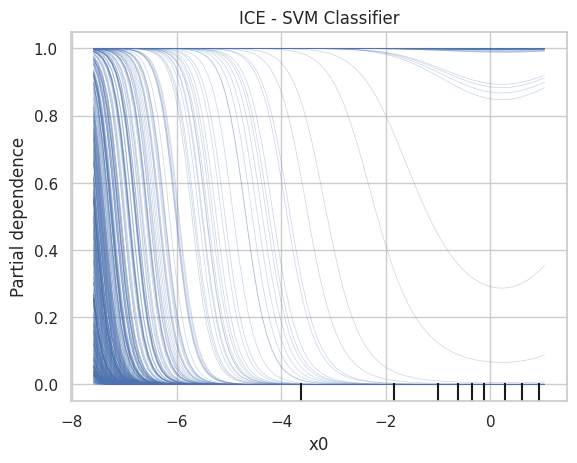

In [ ]:
PartialDependenceDisplay.from_estimator(nb_clf, x_test, features=feature, target=target_class, kind='individual')
plt.title("ICE -  Nb_Classifier")
plt.show()

**LIME**


In [ ]:
!pip install lime shap scikit-learn numpy pandas matplotlib tensorflow pillow

In [ ]:
feature_names = X.columns

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,
    class_names=['Not Fraud', 'Fraud'],
    mode='classification'
)


In [ ]:
i = 10
exp = explainer.explain_instance(
    data_row=x_test[i],
    predict_fn=nb_clf.predict_proba,
    num_features=10
)

exp.show_in_notebook(show_table=True, show_all=False)

**SHAP**


  0%|          | 0/10 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

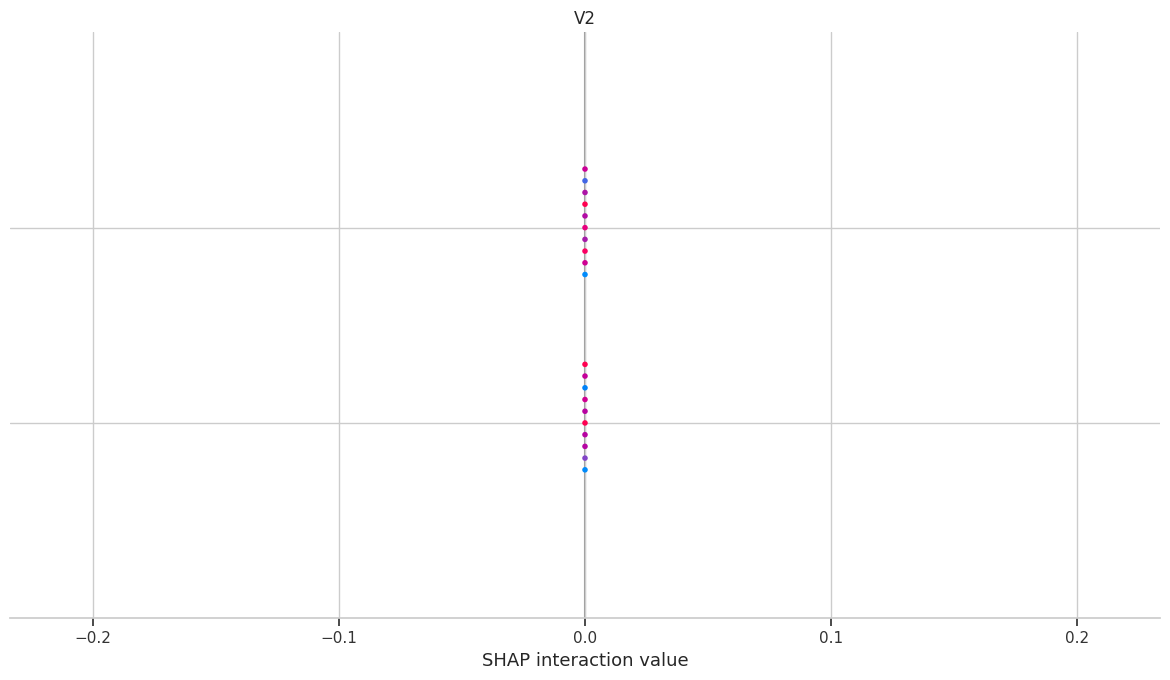

In [ ]:
background = shap.utils.sample(X_train, 100, random_state=42)
explainer = shap.KernelExplainer(nb_clf.predict_proba, background)

shap_values = explainer.shap_values(x_test[:10])
shap.summary_plot(shap_values, pd.DataFrame(x_test[:10], columns=X.columns), feature_names=X.columns)